# Home Loan Approval

In [170]:
# importing major libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [171]:
df = pd.read_csv('loan_sanction_test.csv')

In [172]:
df 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


# Task 1 : DATA EXPLORATION

### The dataset has the following columns:

- Loan_ID: Identifier for the loan.
- Gender: Gender of the applicant.
- Married: Marital status of the applicant.
- Dependents: Number of dependents.
- Education: Education level of the applicant.
- Self_Employed: Whether the applicant is self-employed.
- ApplicantIncome: Income of the applicant.
- CoapplicantIncome: Income of the co-applicant.
- LoanAmount: Loan amount.
- Loan_Amount_Term: Term of the loan in months.
- Credit_History: Credit history of the applicant.
- Property_Area: The area where the property is located (Urban, Semiurban, Rural).

### There are Total 367 rows of Data and 12 Columns present in this Dataset

In [173]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### Missing/Null Values
- Gender has 11 
- Dependents has 10
- Self_Employed has 23
- LoanAmount has 5
- Loan_Amount_Term has 6
- Credit_History has 29 , Missing/Null Values

In [174]:
# Basic Statistics of Numeric Columns
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [176]:
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
categorical_columns = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area']

# Numerical & Categorical Columns
- Numerical = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']
- Categorical = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area']
- There are 5 Numerical and 7 Categorical Columns

# Summary of the key statistics for the numerical columns:

- Applicant Income:

Mean: 4805.60
Std: 4910.69
Min: 0
Max: 72529

- CoapplicantIncome:

Mean: 1569.58
Std: 2334.23
Min: 0
Max: 24000

- LoanAmount:

Mean: 136.13
Std: 60.95
Min: 28
Max: 550

- Loan_Amount_Term:

Mean: 342.82
Std: 64.66
Min: 6
Max: 480

- Credit_History:

Mean: 0.84
Std: 0.37
Min: 0
Max: 1

# Dealing with Missing/Null Values

In [177]:
# Gender

df[df.Gender.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
22,LP001128,NaN,No,0,Graduate,No,3909,0,101.0,360.0,1.0,Urban
51,LP001287,NaN,Yes,3+,Not Graduate,No,3500,833,120.0,360.0,1.0,Semiurban
106,LP001563,NaN,No,0,Graduate,No,1596,1760,119.0,360.0,0.0,Urban
138,LP001769,NaN,No,NaN,Graduate,No,3333,1250,110.0,360.0,1.0,Semiurban
209,LP002165,NaN,No,1,Not Graduate,No,2038,4027,100.0,360.0,1.0,Rural
231,LP002298,NaN,No,0,Graduate,Yes,2860,2988,138.0,360.0,1.0,Urban
245,LP002355,NaN,Yes,0,Graduate,No,3186,3145,150.0,180.0,0.0,Semiurban
279,LP002553,NaN,No,0,Graduate,No,29167,0,185.0,360.0,1.0,Semiurban
296,LP002614,NaN,No,0,Graduate,No,6478,0,108.0,360.0,1.0,Semiurban
303,LP002657,NaN,Yes,1,Not Graduate,Yes,570,2125,68.0,360.0,1.0,Rural


In [178]:
df.Gender.value_counts()

Gender
Male      286
Female     70
Name: count, dtype: int64

In [179]:
df.Gender = df.Gender.fillna('Undefined')

In [180]:
df.Gender.isnull().sum()

0

In [181]:
# Dependents

df.Dependents.isnull().sum()

10

In [182]:
df.Dependents = df.Dependents.fillna('Undefined')

In [183]:
df.Dependents.isnull().sum()

0

In [184]:
# Self_Employed

df.Self_Employed = df.Self_Employed.fillna('Undefined')

In [185]:
df.Self_Employed.isnull().sum()

0

In [186]:
# LoanAmount

df[df.LoanAmount.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
78,LP001415,Male,Yes,1,Graduate,No,3413,4053,NaN,360.0,1.0,Semiurban
101,LP001542,Female,Yes,0,Graduate,No,2262,0,NaN,480.0,0.0,Semiurban
188,LP002057,Male,Yes,0,Not Graduate,No,13083,0,NaN,360.0,1.0,Rural
247,LP002360,Male,Yes,Undefined,Graduate,No,10000,0,NaN,360.0,1.0,Urban
289,LP002593,Male,Yes,1,Graduate,No,8333,4000,NaN,360.0,1.0,Urban


In [187]:
df.LoanAmount.describe()

count    362.000000
mean     136.132597
std       61.366652
min       28.000000
25%      100.250000
50%      125.000000
75%      158.000000
max      550.000000
Name: LoanAmount, dtype: float64

In [188]:
df.LoanAmount.mode()

0    150.0
Name: LoanAmount, dtype: float64

In [189]:
df.LoanAmount.median()

125.0

In [190]:
df.LoanAmount = df.LoanAmount.fillna(136.000000)

In [191]:
df.LoanAmount.isnull().sum()

0

In [192]:
# Loan_Amount_Term

df[df.Loan_Amount_Term.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
45,LP001232,Male,Yes,0,Graduate,No,4260,3900,185.0,NaN,NaN,Urban
48,LP001268,Male,No,0,Graduate,No,6792,3338,187.0,NaN,1.0,Urban
117,LP001611,Male,Yes,1,Graduate,No,1516,2900,80.0,NaN,0.0,Rural
129,LP001695,Male,Yes,1,Not Graduate,No,3321,2088,70.0,NaN,1.0,Semiurban
184,LP002045,Male,Yes,3+,Graduate,No,10166,750,150.0,NaN,1.0,Urban
214,LP002183,Male,Yes,0,Not Graduate,No,3754,3719,118.0,NaN,1.0,Rural


In [193]:
df.Loan_Amount_Term.describe()

count    361.000000
mean     342.537396
std       65.156643
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [194]:
df.Loan_Amount_Term.mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [195]:
df.Loan_Amount_Term.median()

360.0

In [196]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.median())

In [197]:
df.Loan_Amount_Term.isnull().sum()

0

In [198]:
# Credit_History

df[df.Credit_History.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
12,LP001083,Male,No,3+,Graduate,No,4166,0,40.0,180.0,NaN,Urban
26,LP001163,Male,Yes,2,Graduate,No,4363,1250,140.0,360.0,NaN,Urban
28,LP001174,Male,Yes,0,Graduate,No,3772,833,57.0,360.0,NaN,Semiurban
45,LP001232,Male,Yes,0,Graduate,No,4260,3900,185.0,360.0,NaN,Urban
90,LP001475,Male,Yes,0,Graduate,Yes,3188,2286,130.0,360.0,NaN,Rural
99,LP001527,Male,Yes,3+,Graduate,No,6835,0,188.0,360.0,NaN,Semiurban
104,LP001558,Male,No,0,Graduate,No,2243,2233,107.0,360.0,NaN,Semiurban
115,LP001601,Male,No,3+,Graduate,No,4243,4123,157.0,360.0,NaN,Semiurban
139,LP001771,Female,No,3+,Graduate,No,4083,0,103.0,360.0,NaN,Semiurban


In [199]:
df.Credit_History.value_counts()

Credit_History
1.0    279
0.0     59
Name: count, dtype: int64

In [200]:
df.Credit_History.describe()

count    338.000000
mean       0.825444
std        0.380150
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [201]:
df.Credit_History = df.Credit_History.fillna(df.Credit_History.median())

In [202]:
df.Credit_History.isnull().sum()

0

In [203]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

- This Data Set now has 0 Null Values

In [204]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,136.130790,342.822888,0.839237
std,4910.685399,2334.232099,60.946042,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# Task 2 : DATA VISUALIZATION

## Univariate Analysis

### Boxplot for Numerical Columns

- Numerical = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']

In [274]:
# Applicant Income

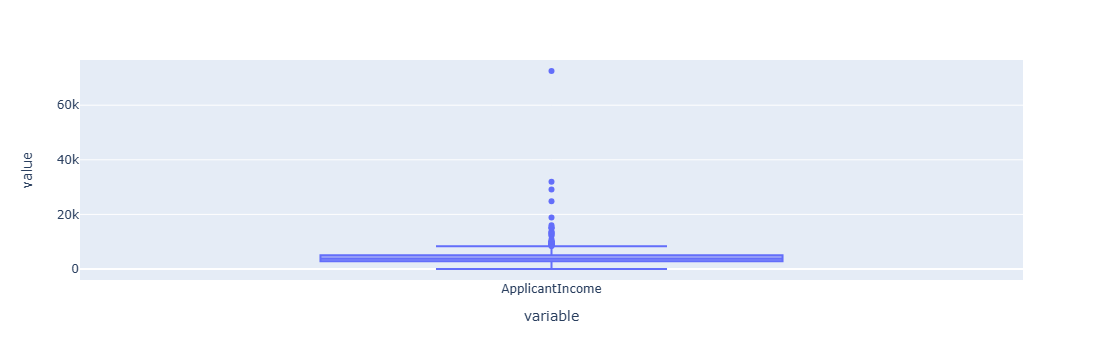

In [207]:
px.box(df.ApplicantIncome)

In [275]:
# Loan Amount

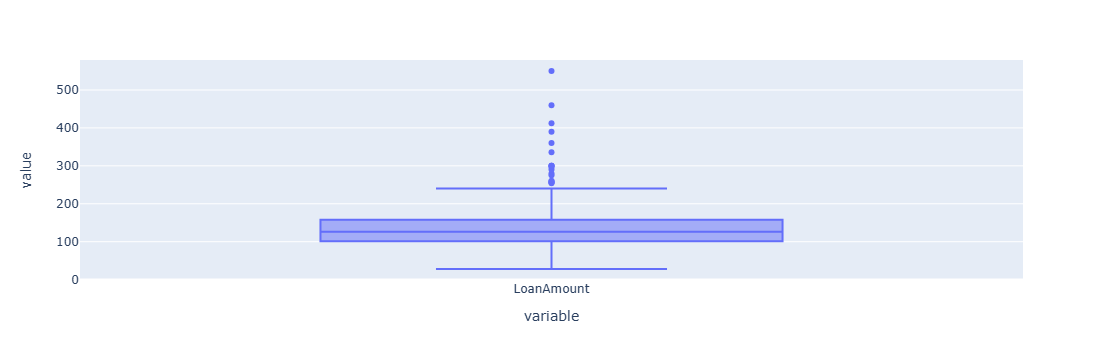

In [209]:
px.box(df.LoanAmount)

In [276]:
# Loan Amount Term

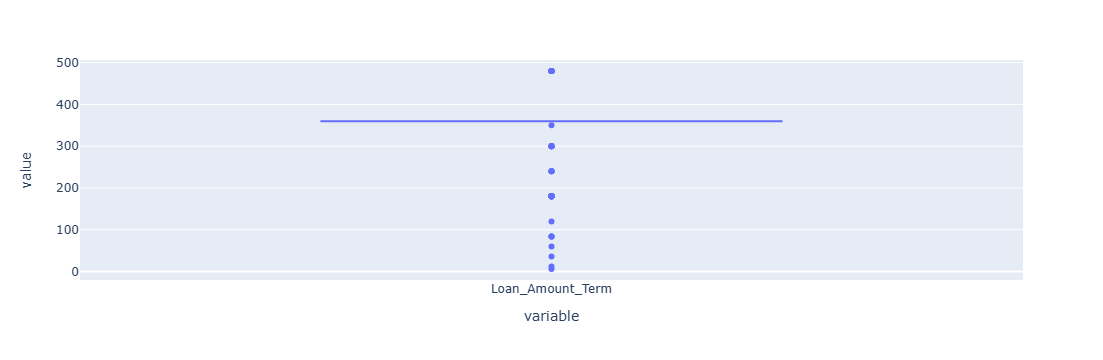

In [211]:
px.box(df.Loan_Amount_Term)

In [277]:
# Coapplicant Term

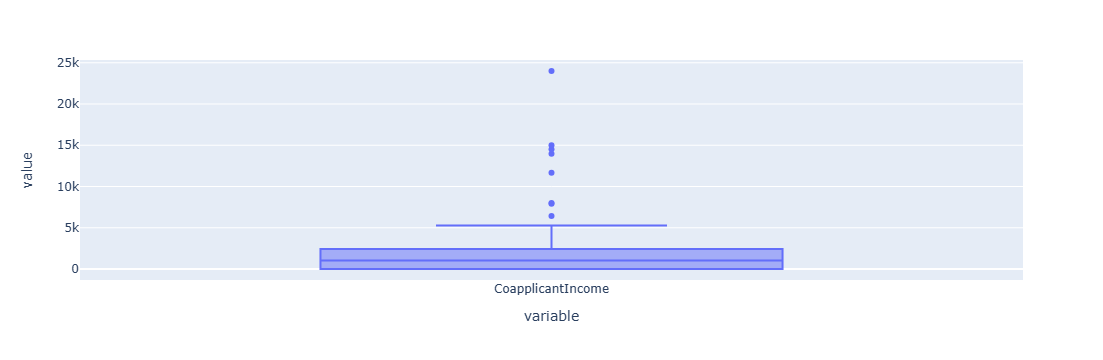

In [213]:
px.box(df.CoapplicantIncome)

### Bar Charts and Pie Chart for Categorical Columns

- Categorical = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area']

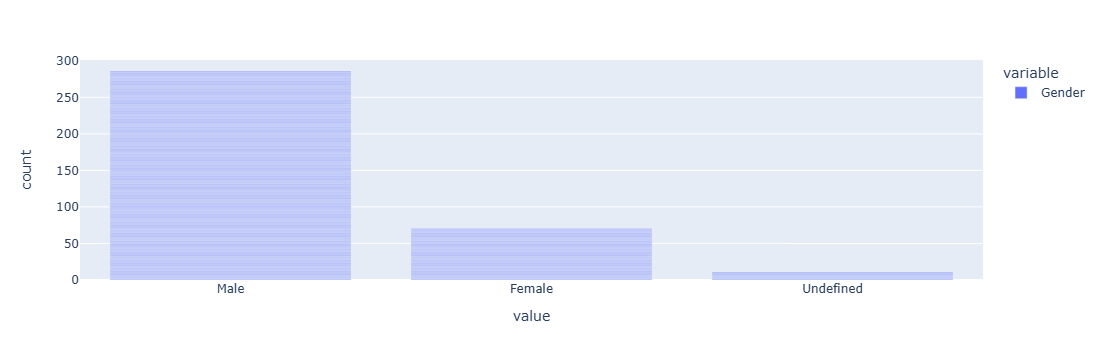

In [216]:
# Gender

px.bar(df.Gender)

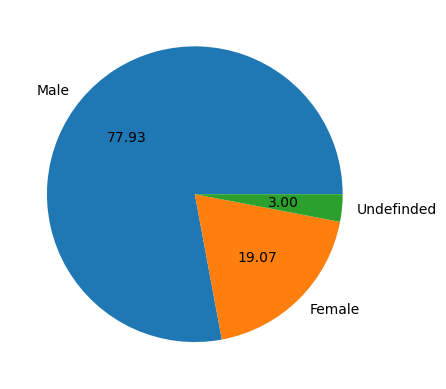

In [217]:
plt.pie(df.Gender.value_counts(),labels=['Male','Female','Undefinded'],autopct='%.2f')
plt.show()

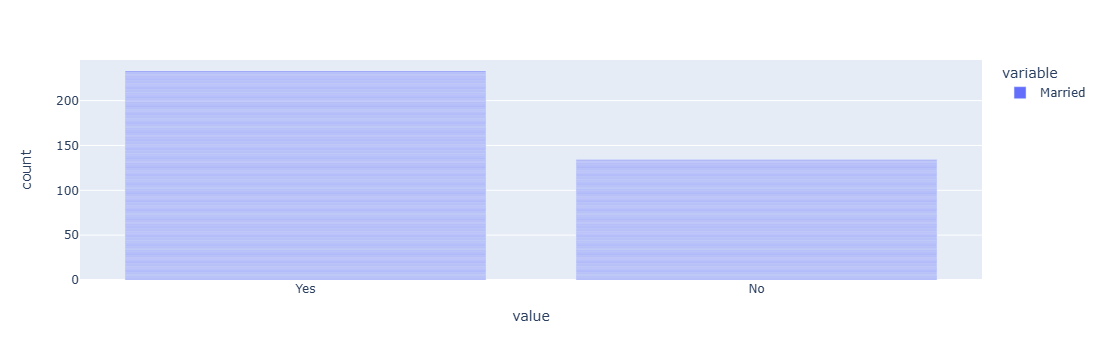

In [218]:
# Married

px.bar(df.Married)

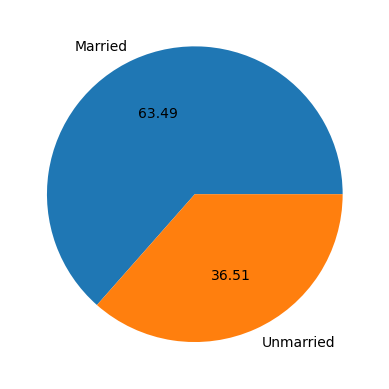

In [219]:
plt.pie(df.Married.value_counts(),labels=['Married','Unmarried'],autopct='%.2f')
plt.show()

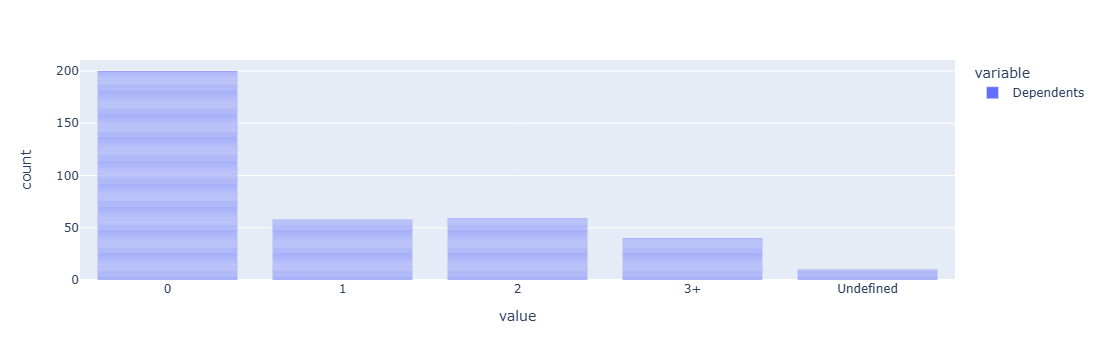

In [220]:
# Dependents

px.bar(df.Dependents)

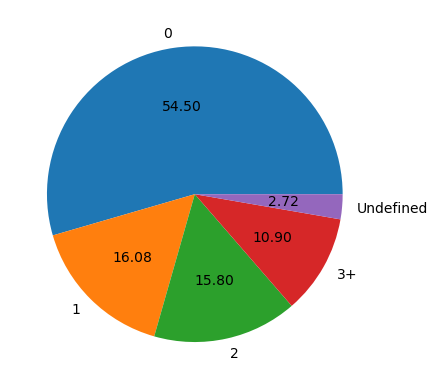

In [221]:
plt.pie(df.Dependents.value_counts(),labels=['0','1','2','3+','Undefined'],autopct='%.2f')
plt.show()

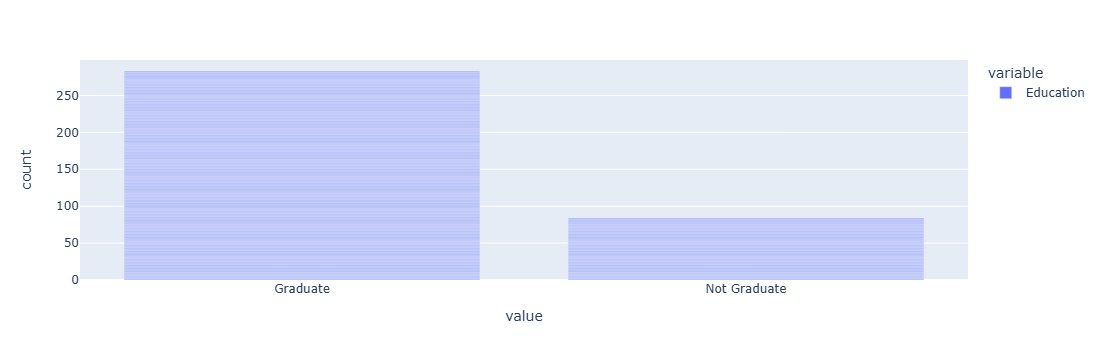

In [222]:
# Education

px.bar(df.Education)

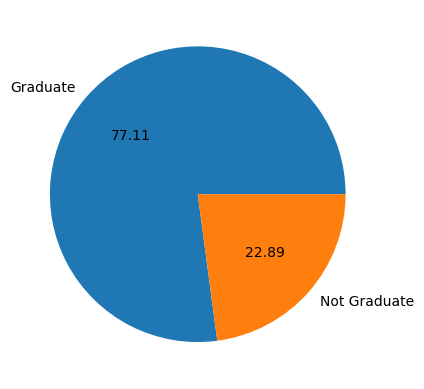

In [223]:
plt.pie(df.Education.value_counts(),labels=['Graduate','Not Graduate'],autopct='%.2f')
plt.show()

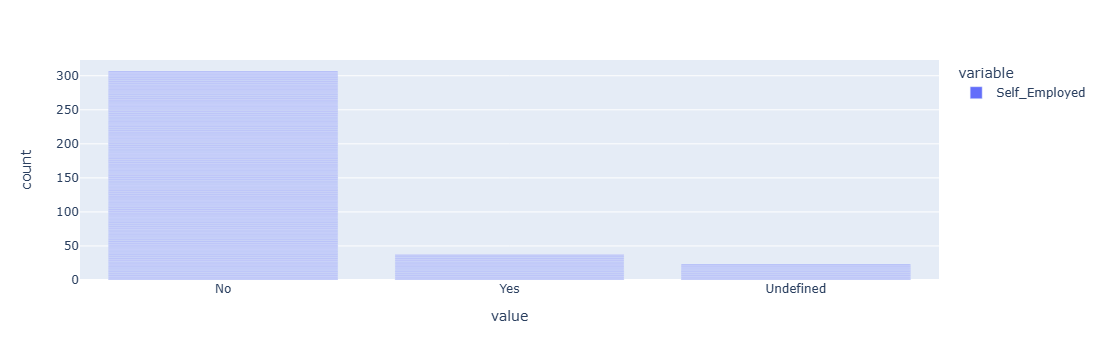

In [224]:
# Self_Employed

px.bar(df.Self_Employed)

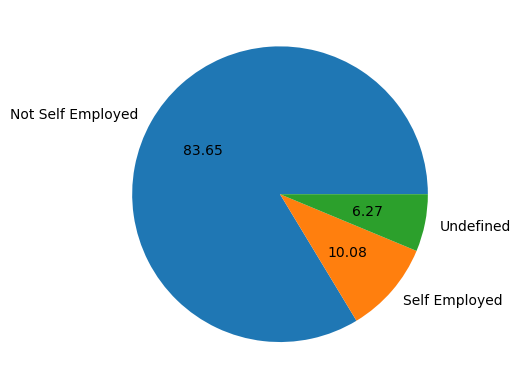

In [225]:
plt.pie(df.Self_Employed.value_counts(),labels=['Not Self Employed','Self Employed','Undefined'] ,autopct='%.2f')
plt.show()

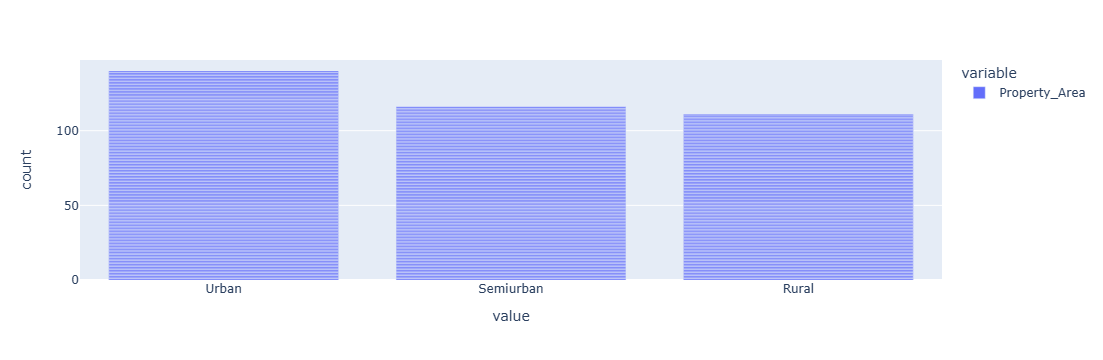

In [226]:
# Property Area

px.bar(df.Property_Area)

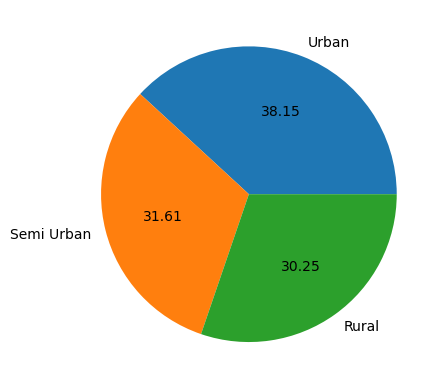

In [227]:
plt.pie(df.Property_Area.value_counts(),labels=['Urban','Semi Urban','Rural'],autopct='%.2f')
plt.show()

## Explanations and Interpretations:

### Gender Distribution: 
- Shows the distribution of male and female applicants.

### Marital Status Distribution: 
- Shows the distribution of married and unmarried applicants.

### Dependents Distribution: 
- Indicates the number of dependents applicants have, with most having zero or one dependent.

### Education Distribution: 
- Shows the education level of applicants, with a higher number of graduates.

### Self Employment Distribution: 
- Indicates whether applicants are self-employed or not, with a majority being not self-employed.

### Property Area Distribution: 
- Shows the area type where the property is located (Urban, Semiurban, Rural).

# Bivariate Analysis

### Exploring Relationship Between Pairs of Numeric Variables
#### SCATTERPLOTS

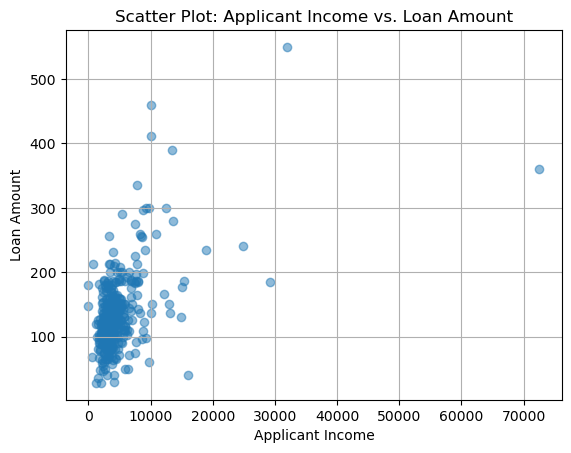

In [228]:
plt.scatter(df['ApplicantIncome'], df['LoanAmount'], alpha=0.5)
plt.title('Scatter Plot: Applicant Income vs. Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()

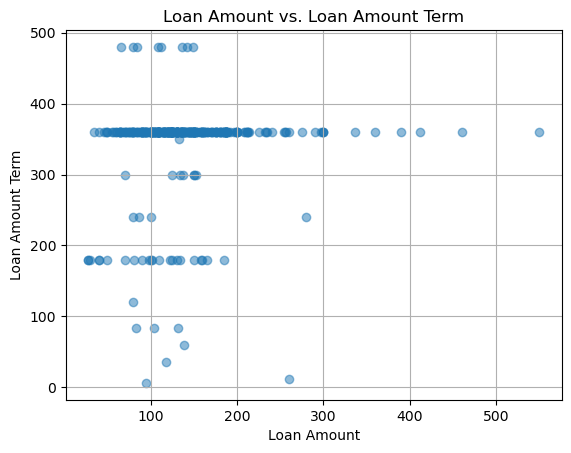

In [229]:
plt.scatter(df['LoanAmount'], df['Loan_Amount_Term'], alpha=0.5)
plt.title('Loan Amount vs. Loan Amount Term')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Amount Term')
plt.grid(True)
plt.show()

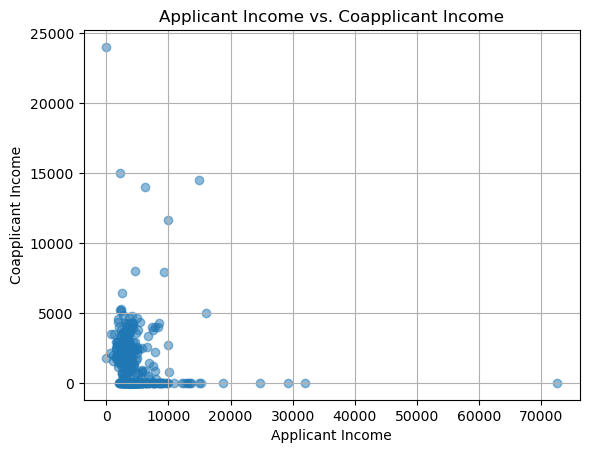

In [230]:
plt.scatter(df['ApplicantIncome'], df['CoapplicantIncome'], alpha=0.5)
plt.title('Applicant Income vs. Coapplicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Coapplicant Income')
plt.grid(True)
plt.show()

### The relationship between categorical and numeric variables using box plots

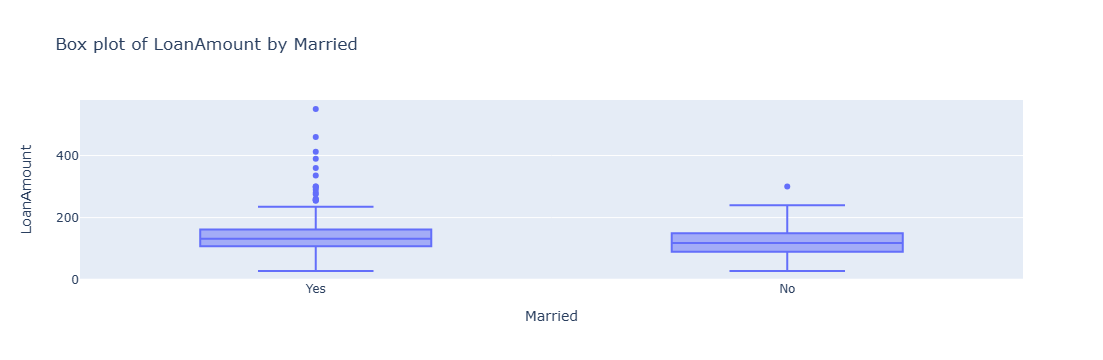

In [236]:
px.box(df, x='Married', y='LoanAmount', title='Box plot of LoanAmount by Married')

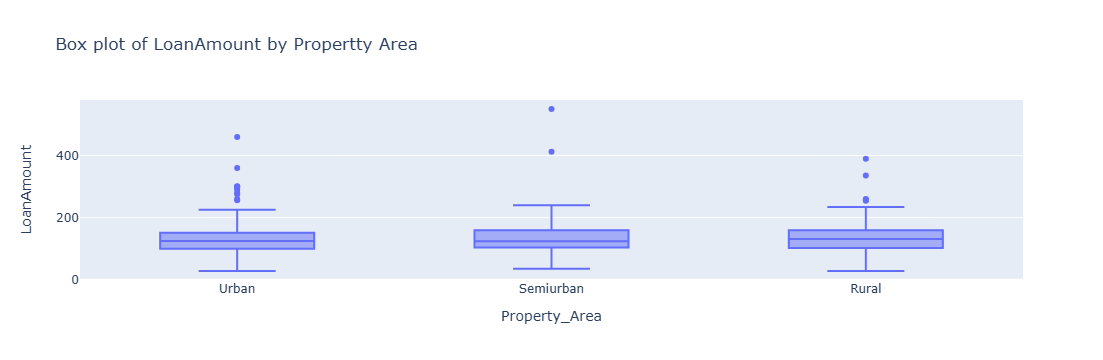

In [239]:
px.box(df, x='Property_Area', y='LoanAmount', title='Box plot of LoanAmount by Propertty Area')

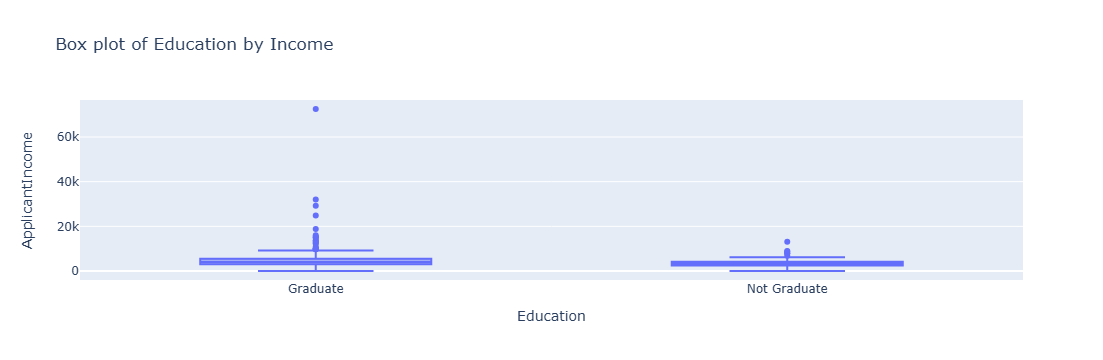

In [241]:
px.box(df, x='Education', y='ApplicantIncome', title='Box plot of Education by Income')

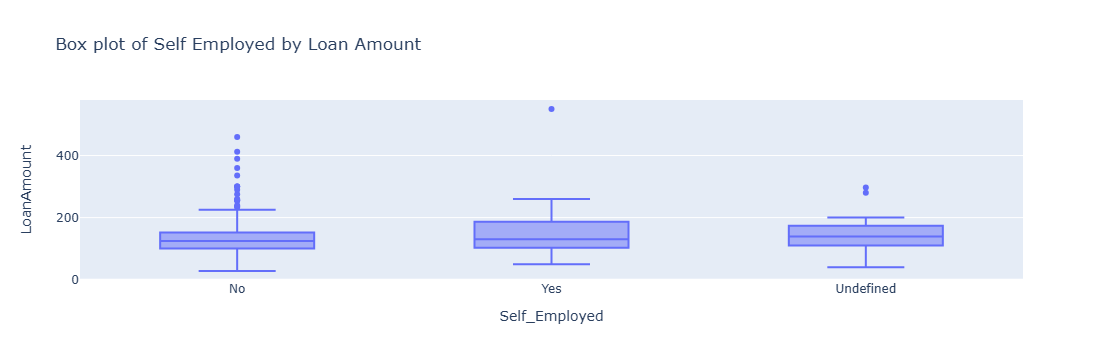

In [244]:
px.box(df, x='Self_Employed', y='LoanAmount', title='Box plot of Self Employed by Loan Amount')

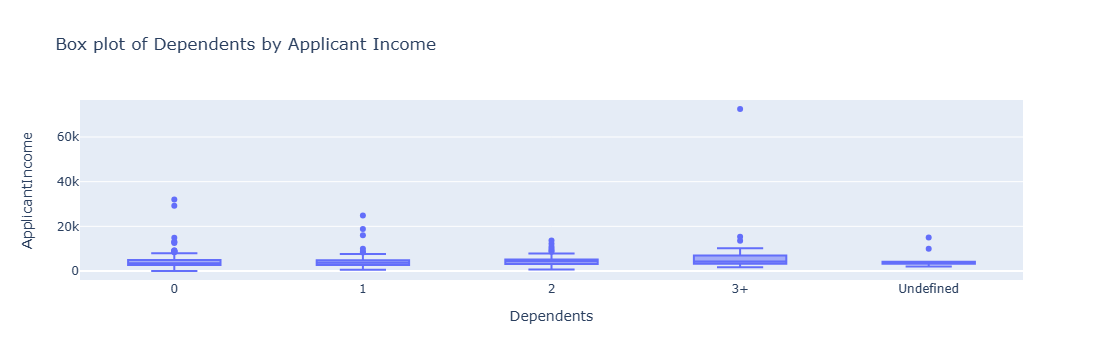

In [245]:
px.box(df, x='Dependents', y='ApplicantIncome', title='Box plot of Dependents by Applicant Income')

# Multivariate Analysis

### Correlation analysis to identify relationships between numeric variables & correlations using a heatmap.

In [255]:
numeric_data = df.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.110335    0.490158   
CoapplicantIncome        -0.110335           1.000000    0.150111   
LoanAmount                0.490158           0.150111    1.000000   
Loan_Amount_Term          0.023319          -0.008633    0.093458   
Credit_History            0.094944          -0.058004   -0.013198   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome            0.023319        0.094944  
CoapplicantIncome         -0.008633       -0.058004  
LoanAmount                 0.093458       -0.013198  
Loan_Amount_Term           1.000000       -0.048189  
Credit_History            -0.048189        1.000000  


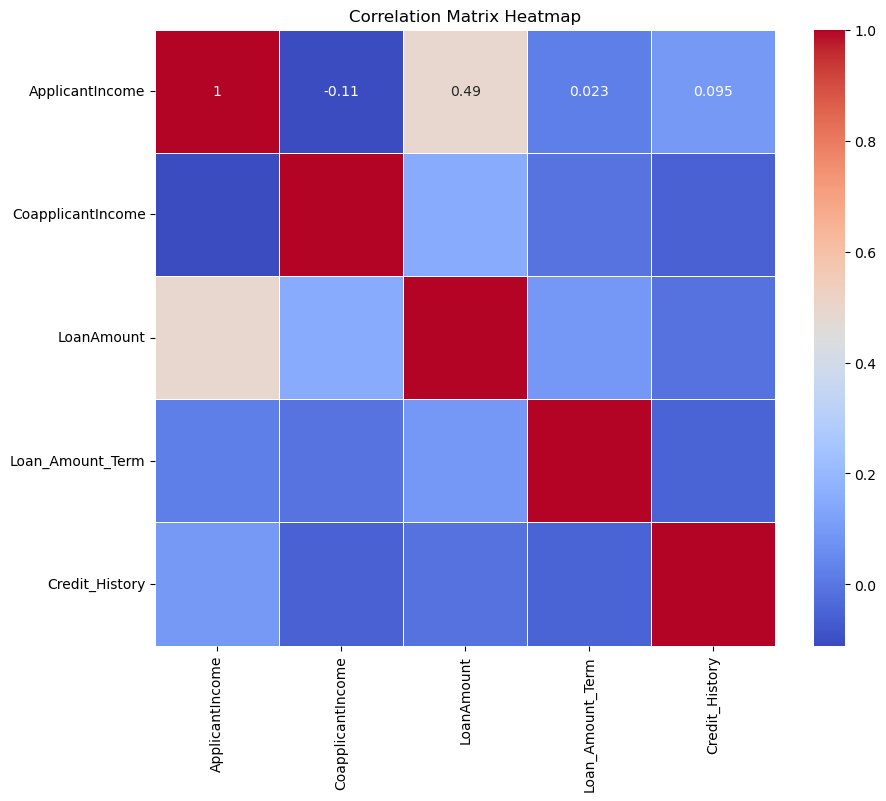

In [253]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

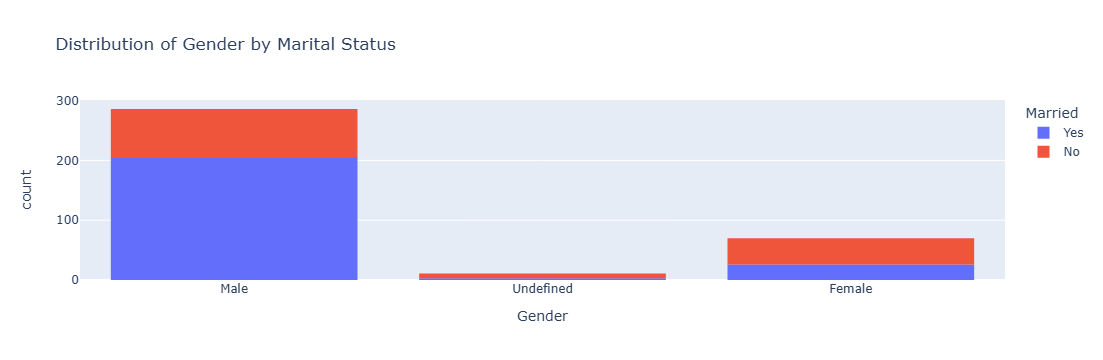

In [265]:
px.histogram(df, x='Gender', color='Married', title='Distribution of Gender by Marital Status')

## Visualizing the distribution of key numerical features and the relationships between them :

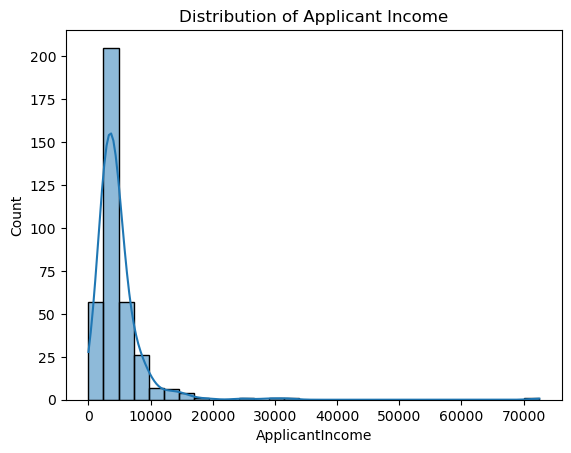

In [270]:
# Distribution of ApplicantIncome
sns.histplot(df['ApplicantIncome'], bins=30, kde=True)
plt.title('Distribution of Applicant Income')
plt.show()

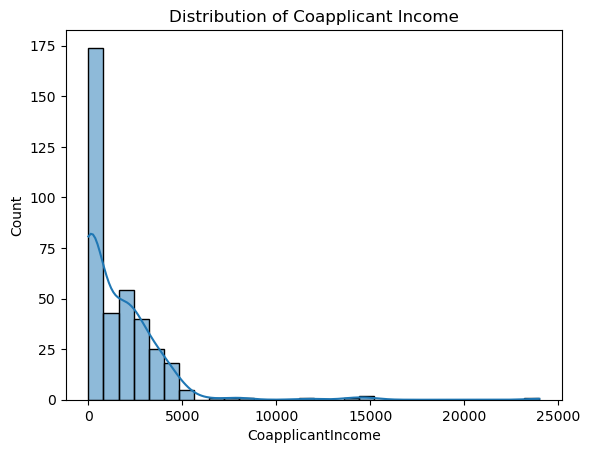

In [271]:
# Distribution of CoapplicantIncome
sns.histplot(df['CoapplicantIncome'], bins=30, kde=True)
plt.title('Distribution of Coapplicant Income')
plt.show()

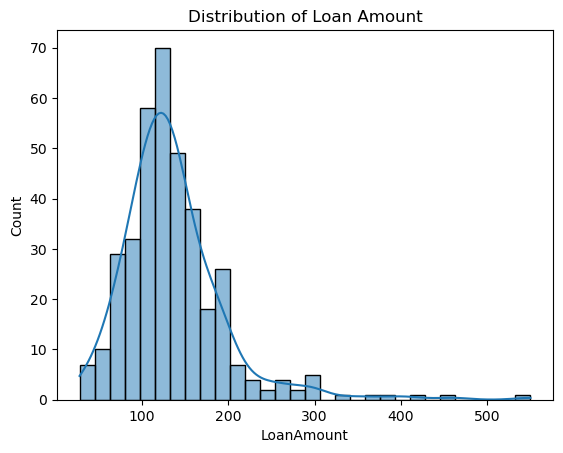

In [272]:
# Distribution of LoanAmount
sns.histplot(df['LoanAmount'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.show()

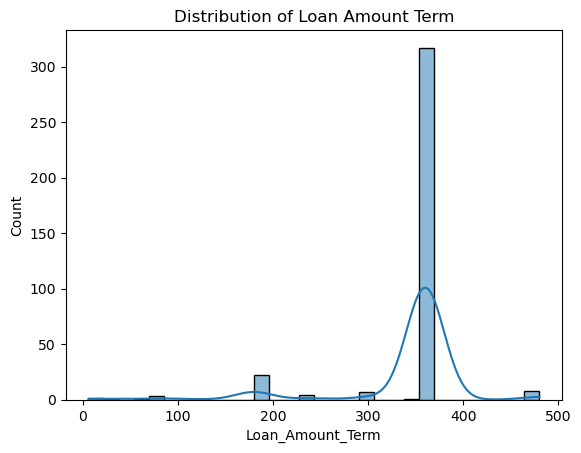

In [273]:
# Distribution of Loan_Amount_Term
sns.histplot(df['Loan_Amount_Term'], bins=30, kde=True)
plt.title('Distribution of Loan Amount Term')
plt.show()

## The distributions of key numerical features are as follows:

### Applicant Income: 
- The distribution is right-skewed with a few very high-income outliers.
### Coapplicant Income: 
- This distribution is also right-skewed, with most coapplicants having zero income and a few having high incomes.
### Loan Amount: 
- The distribution is right-skewed, with most loan amounts concentrated at lower values and fewer high loan amounts.
### Loan Amount Term: 
- Most loans have terms of 360 months, with a few variations.

--------------------------------------------------------------------------------------------------------------------------------------------------------

# Data Card: Home Loan Approval Dataset

## General Information

- **Title**: Home Loan Approval Dataset
- **Source**: Skill Circle
- **Description**: This dataset contains information about applicants applying for home loans, including personal details, income, loan amount, loan term, credit history, and property area.
- **Size**: 367 rows and 12 columns
- **Primary Use Case**: Analyzing factors affecting home loan approval.

## Column Descriptions

| Column Name          | Data Type | Description |
|----------------------|-----------|-------------|
| **Loan_ID**          | Object    | Unique Identifier for each loan application |
| **Gender**           | Object    | Gender of the applicant (Male/Female) |
| **Married**          | Object    | Marital status of the applicant (Yes/No) |
| **Dependents**       | Object    | Number of dependents (0, 1, 2, 3+) |
| **Education**        | Object    | Education level of the applicant (Graduate/Not Graduate) |
| **Self_Employed**    | Object    | Whether the applicant is self-employed (Yes/No) |
| **ApplicantIncome**  | Integer   | Income of the applicant |
| **CoapplicantIncome**| Float     | Income of the coapplicant (if any) |
| **LoanAmount**       | Float     | Loan amount applied for |
| **Loan_Amount_Term** | Float     | Term of the loan in months |
| **Credit_History**   | Float     | Credit history meets guidelines (1.0: Yes, 0.0: No) |
| **Property_Area**    | Object    | Property area type (Urban/Semiurban/Rural) |

## Key Insights

- **Gender Distribution**: Most applicants are male.
- **Marital Status Distribution**: A higher number of applicants are married.
- **Dependents**: Majority of applicants have zero or one dependent.
- **Education**: More graduates apply for loans compared to non-graduates.
- **Self Employment**: Few applicants are self-employed.
- **Applicant Income**: Right-skewed distribution, with a few high-income outliers.
- **Coapplicant Income**: Right-skewed, many coapplicants have zero income.
- **Loan Amount**: Right-skewed, most loans are of lower amounts.
- **Loan Amount Term**: Most loans have a term of 360 months.
- **Property Area**: Properties are mainly located in urban and semiurban areas.

## Data Quality and Preparation

- **Missing Values**: No missing values in the dataset.
- **Outliers**: Outliers present in `ApplicantIncome` and `CoapplicantIncome`.
- **Feature Engineering**: Not performed in initial analysis.

## Potential Analyses

- **Hypothesis Testing**: To understand the influence of education level, marital status, credit history, and property area on loan amounts.
- **Predictive Modelling**: Future work could include predictive modeling for loan approval using features in this dataset.

## Usage Considerations

- **Privacy**: Ensure that sensitive information is handled appropriately.
- **Bias**: Be aware of potential biases in the data, especially related to demographic attributes.

## References

- **Dataset Source**: Provided by Skill Circle.

--------------------------------------------------------------------------------------------------------------------------------------------------------